In [126]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Random points')

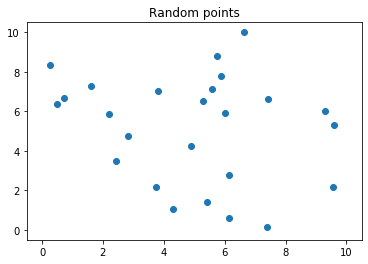

In [127]:
n = 25 # number of points
points = np.random.rand(n, 2) * 10
# print(points)
plt.scatter(points[:, 0], points[:, 1])
plt.xlim([-0.5, 10.5])
plt.ylim([-0.5, 10.5])
plt.title('Random points')

# Grahman scan

A nice property of convex hulls is that given a pair of points $p_0$ and $p_1$ all the remaining points in the convex hull are either on the left or right of the line spanned by these two points. In other words:

$$ p_1 - p_0 \times p - p_0 \quad \textrm{is either positive or negative} \quad \forall p \in convex$$

We can use this property to build the convex hull iteratively.

In [128]:
def orientation_test(p_0, p_1, p_2):
    '''Return > 0 if clockwise, <0 if counterclockwise and 0 if co-linear.'''
    
    # return (p_1[1] - p_0[1]) * (p_2[0] - p_1[0]) - (p_1[0] - p_0[0]) * (p_2[1] - p_1[1])
    return np.cross(p_1 - p_0, p_2 - p_0)

Then to compute the Convex hull we first get the anchor point i.e. the point with the lowest y-coordinate. Then we sort the points on the polar coordinates of this point.

Then, we start from the first (sorted) pair of points and check the wheter the cross product of the segments $\bar{p_0p_1}$ $\bar{p_0p_2}$ is positive (or negative?). It should be clear that if p_2 belongs to the conve hull then this product should be negative.

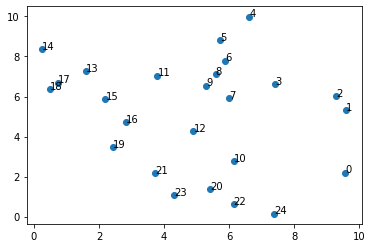

In [133]:

anchor_point = points[0]
for p in points:
    if p[1] < anchor_point[1]:
        anchor_point = p
    elif p[1] == anchor_point[1] and p[0] < anchor_point[0]:
        anchor_point = p

# sort the points by polar coordinate
from math import atan2

def polar_angle(p0, p1):
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)

points_angles = []
origin = [0,0]
for p in points:
    angle = polar_angle(anchor_point, p)
    points_angles.append(angle)

points_angles = np.array(points_angles)
index = points_angles.argsort()    
sorted_points = points[index]

fig, ax = plt.subplots()
ax.scatter(points[:,0], points[:,1])
# ax.scatter(sorted_points[:1,0], sorted_points[:1,1], c='g')
for idx, p in enumerate(sorted_points):
    ax.annotate(idx, p)


In [130]:


def sort_by_x_axis(points: np.array):
    '''Sort by x-coordinate'''
    return points[points[:, 0].argsort()]

# sorted_points = sort_by_x_axis(points)

# Init the list representng the convex hull with the first 2 points
ch = list( [ sorted_points[0], sorted_points[1] ] )
for p in sorted_points[2:]:
    while orientation_test(ch[-2], ch[-1], p) <= 0 and len(ch)>2:
        ch.pop()
    ch.append(p)

ch = np.array(ch) # convert back to numpy array 
# print('The resulting convex hull is: \n', ch)
print('The convex hull containts {} vertices.'.format(len(ch)))


The convex hull containts 9 vertices.


Text(0.5, 1.0, 'Convex hull')

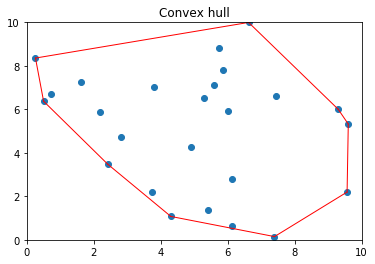

In [131]:
for i in range(len(ch)): # plot convex hull
    if i == len(ch)-1:
        xx = [ch[i][0], ch[0][0]]
        yy = [ch[i][1], ch[0][1]]
    else:
        xx = [ch[i][0], ch[i+1][0]]
        yy = [ch[i][1], ch[i+1][1]]
    plt.plot(xx, yy, 'r', lw=1)

plt.scatter(points[:, 0], points[:, 1], zorder=0)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Convex hull')

# Complexity analysis of Grahman Scan

Good! How long does it take to compute the convex hull?

1. Sorting the points: $\mathcal{O}(nlogn)$
2. iterate through the points: $\mathcal{O}(n)$
3. 

Therefore the total complexity is $\mathcal{O}(nlogn)$. Can we do better than $\mathcal{O}(nlogn)$? As instance, can we solve the problem in $\mathcal{O}(n)$?

Short answer: No, you can't.

Long answer: if you could solve the problem of computing a convex hull in $\mathcal{O}(n)$ you would contradict  (FORGOT NAME THEOREM)


TODO check this and update regardig $\Omega(n)$